# 2. Data visualization in histogram....

In [179]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [180]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [181]:
tips.shape

(244, 7)

C:\Users\arman\AppData\Local\Temp\ipykernel_16272\817576815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['size'])


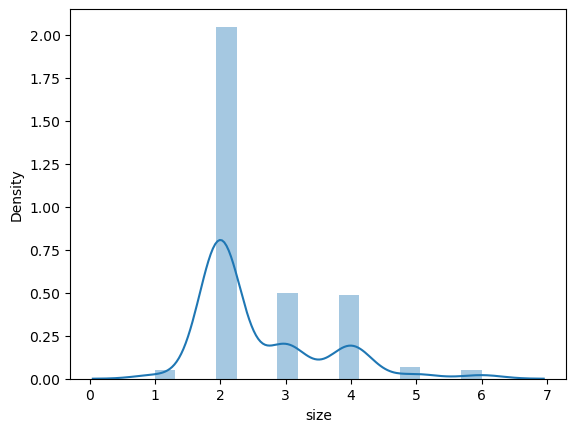

In [182]:
sns.distplot(tips['size'])
plt.show()

# 3. Strongly correlation features...

In [184]:
pivot_data = tips.pivot_table(index="day", columns="time", values="tip", aggfunc="mean")
pivot_data

C:\Users\arman\AppData\Local\Temp\ipykernel_16272\318337051.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = tips.pivot_table(index="day", columns="time", values="tip", aggfunc="mean")


time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


<Axes: xlabel='time', ylabel='day'>

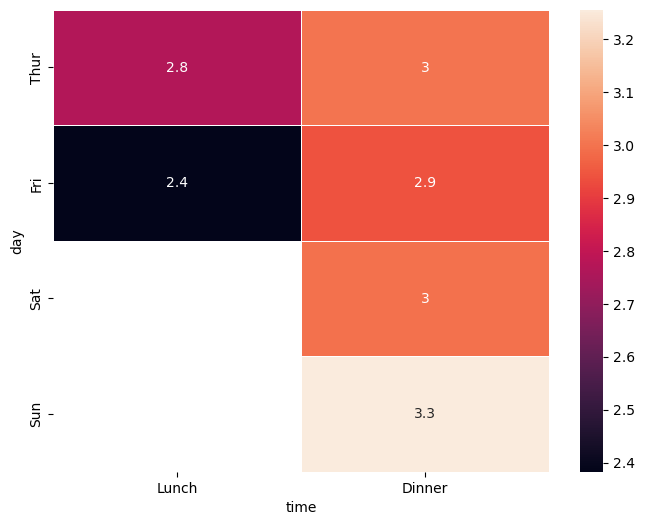

In [185]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_data, annot=True, linewidths=0.5, alpha=1)

In [186]:
data = tips.drop(columns=['sex', 'smoker', 'day', 'time'], errors='ignore')

data.shape

(244, 3)

In [187]:
data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Text(0.5, 1.0, 'Correlation Matrix of tips Dataset')

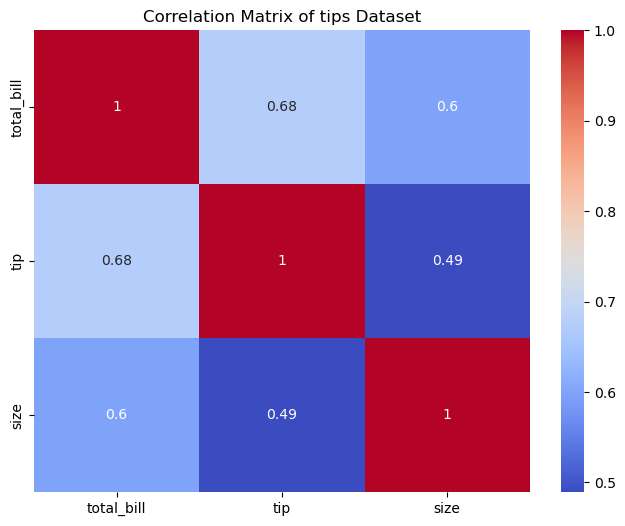

In [188]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of tips Dataset')

In [189]:
# Step 5: Strongly correlated features ko identify karna
# Strong correlation usually +- 0.8 ke aas paas hoti hai

strongly_correlated_features = data.corr()[(data.corr() >= 0.8) | (data.corr() <= -0.8)]
strongly_correlated_features.head()

,total_bill,tip,size
total_bill,1.0,NaN,NaN
tip,NaN,1.0,NaN
size,NaN,NaN,1.0


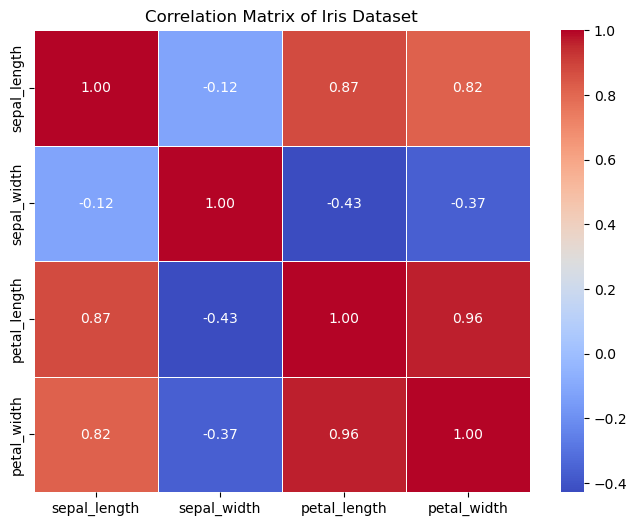

Strongly Correlated Features:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000          NaN      0.871754     0.817941
sepal_width            NaN          1.0           NaN          NaN
petal_length      0.871754          NaN      1.000000     0.962865
petal_width       0.817941          NaN      0.962865     1.000000


In [190]:
# Step 1: Libraries import karna
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load dataset
# Yahan hum Iris dataset use kar rahe hain
data1 = sns.load_dataset('iris')

data1.drop(columns=["species"], inplace=True)

# Step 3: Correlation matrix calculate karna
correlation_matrix = data1.corr()

# Step 4: Correlation matrix ko heatmap mein plot karna
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

# Step 5: Strongly correlated features ko identify karna
# Strong correlation usually +- 0.8 ke aas paas hoti hai
strongly_correlated_features = correlation_matrix[(correlation_matrix >= 0.8) | (correlation_matrix <= -0.8)]
print("Strongly Correlated Features:")
print(strongly_correlated_features)



# 4. Exploratory data analysis (EDA)...

In [192]:
data2 = pd.read_csv("cardata.csv")
data2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [193]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [194]:
data2.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


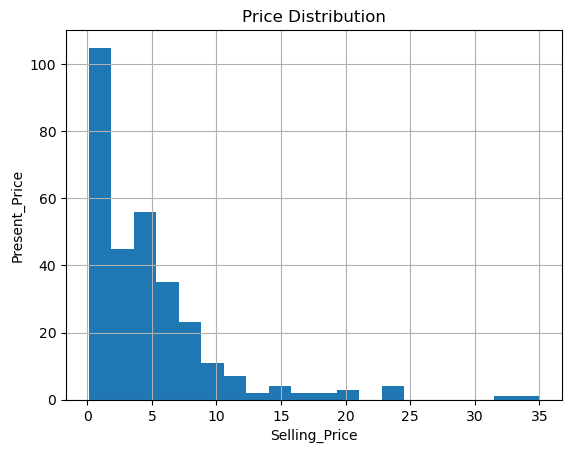

In [195]:
data2['Selling_Price'].hist(bins=20)
plt.title("Price Distribution")
plt.xlabel("Selling_Price")
plt.ylabel("Present_Price")
plt.show()


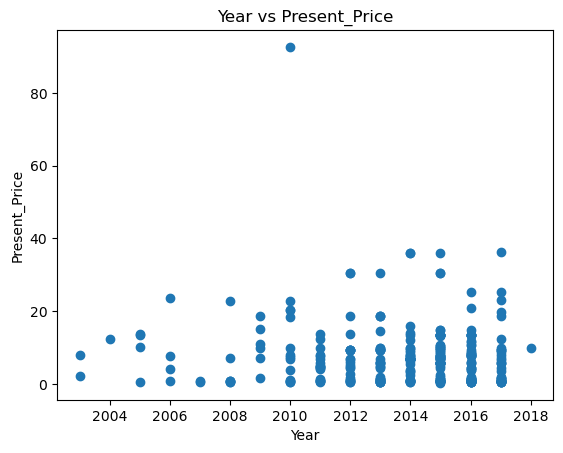

In [196]:
plt.scatter(data2['Year'], data2['Present_Price'])
plt.title("Year vs Present_Price")
plt.xlabel("Year")
plt.ylabel("Present_Price")
plt.show()


# 5. Detect and visualize outliers...

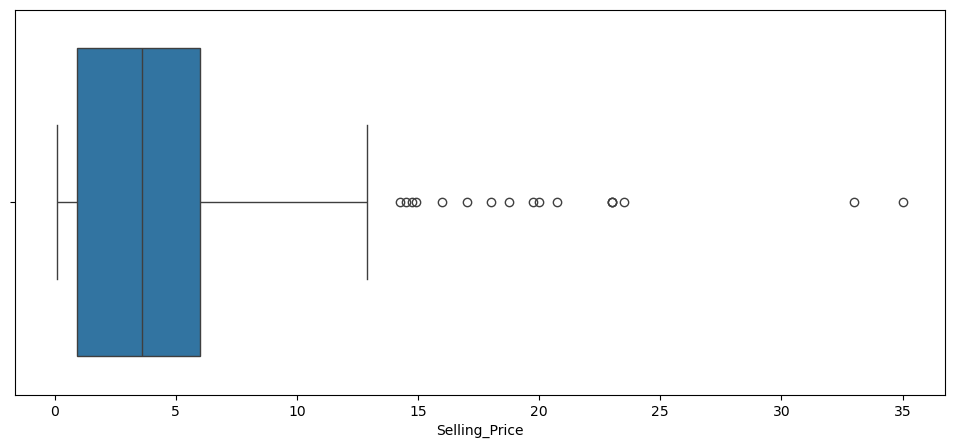

In [198]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "Selling_Price", data=data2)
plt.show()

In [199]:
data2.shape

(301, 9)

In [200]:
q1 = data2['Selling_Price'].quantile(0.25)
q3 = data2['Selling_Price'].quantile(0.75)

IQR = q3 - q1

In [201]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

min_range , max_range

(-6.749999999999999, 13.649999999999999)

In [202]:
data3 = data2[data2["Selling_Price"] <= max_range]
data3.shape

(284, 9)

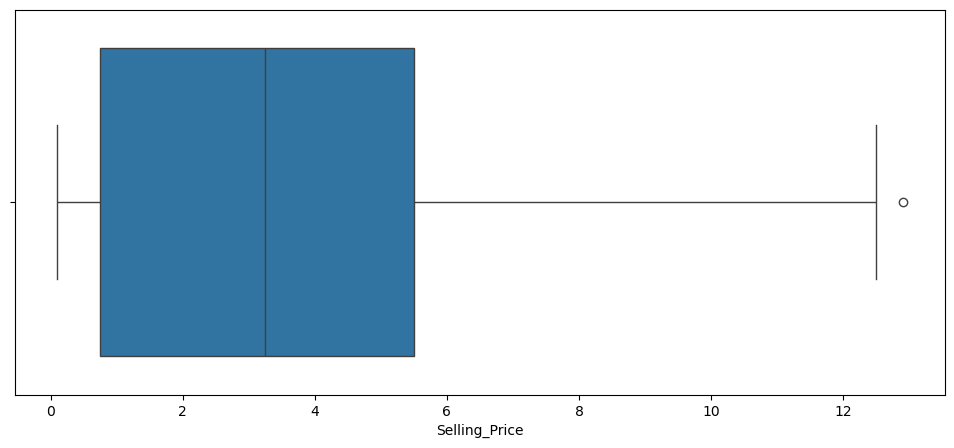

In [203]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "Selling_Price", data=data3)
plt.show()

# 6. Pairplot....

In [205]:
data4 = sns.load_dataset("iris")

data4.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


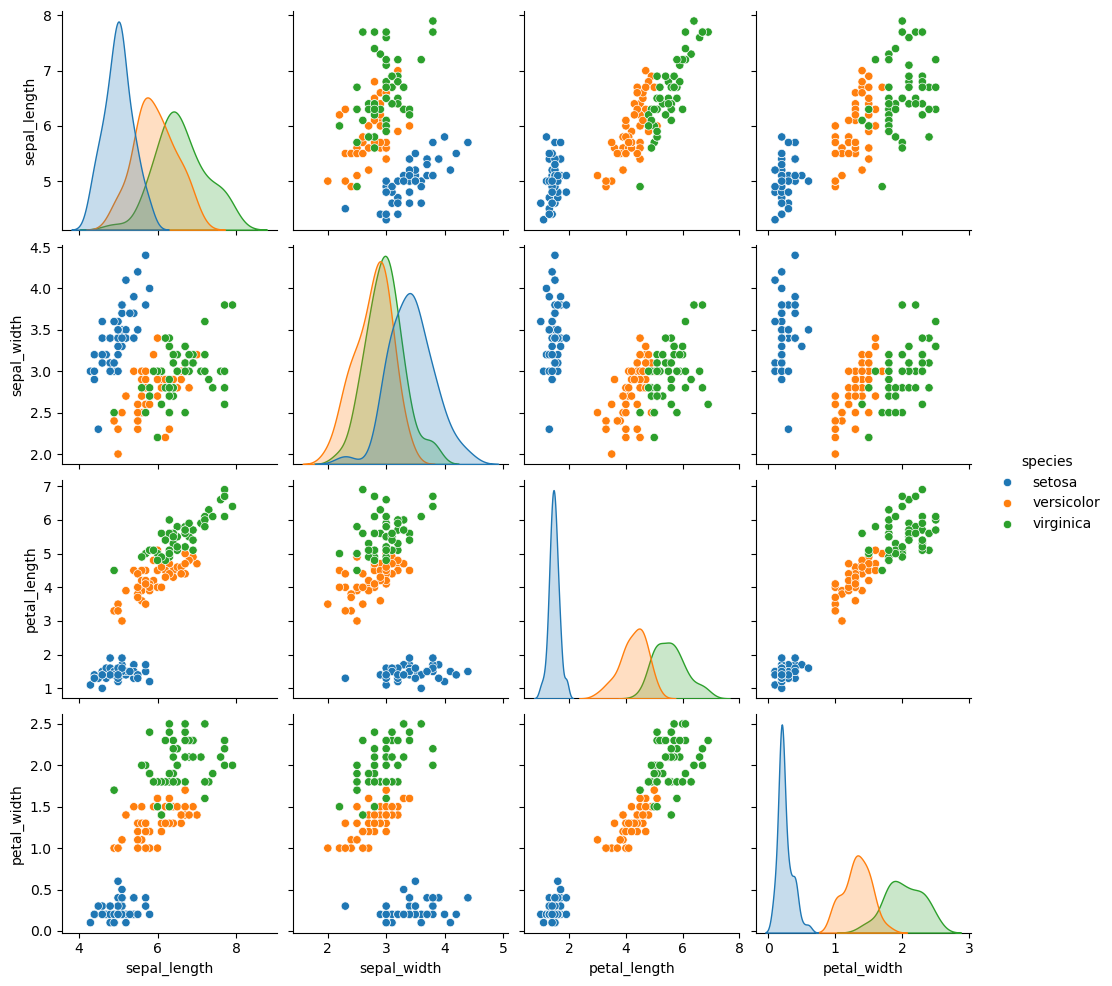

In [206]:
sns.pairplot(data4, hue='species')

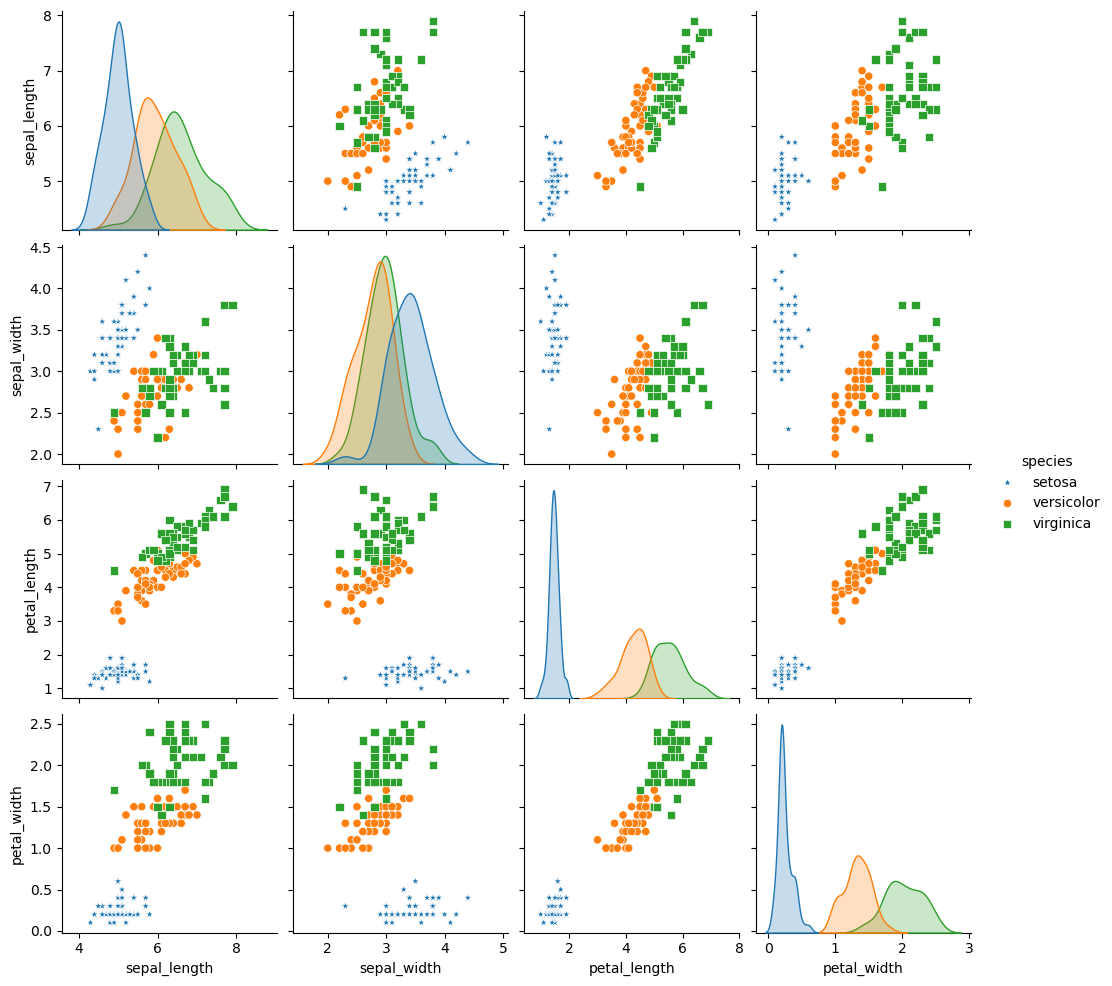

In [207]:
sns.pairplot(data4, hue='species', markers=['*','o','s'])

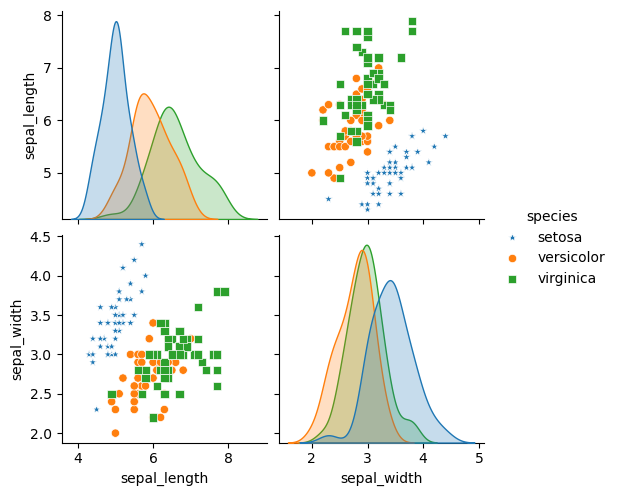

In [219]:
sns.pairplot(data4, hue='species', markers=['*','o','s'], vars=['sepal_length','sepal_width'])